In [1]:
#Importing the libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


In [2]:
#Loading the dataset
fake = pd.read_csv("data/fake.csv")
true= pd.read_csv('data/true.csv')

In [3]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [6]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [7]:
true.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [8]:
fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [9]:
#Lets cobmibe the two datasets (fake and true into one)
# Add label columns
fake['label'] = 1  # 1 for fake news
true['label'] = 0  # 0 for true news
#Concat the two
df = pd.concat([fake, true], ignore_index=True)
#Shuffle the comined dataFrame ie, df
df =df.sample(frac=1).reset_index(drop=True)

In [10]:
df = df.drop_duplicates()

In [11]:
#Save the dataset now
df.to_csv('final.csv', index=False)

In [12]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [13]:
df.describe()

,label
count,44689.000000
mean,0.525364
std,0.499362
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [14]:
df.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

Data Preprocessing 

It includes :-

Lowercasing the text

Removing the pouctuations

Using stopwords

Tokanization

Lemmitization and stemming

In [15]:
#Download the stopwods
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ossum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ossum\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


In [17]:
#Defining a function to handle this preprocessing
def preprocessing(text):
    #Remove the punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    #Lowercase the text
    text = text.lower()
    text = text.strip()
    #Tokenize the text
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(tokens)
df['preprocessed_text'] = df['text'].apply(preprocessing)

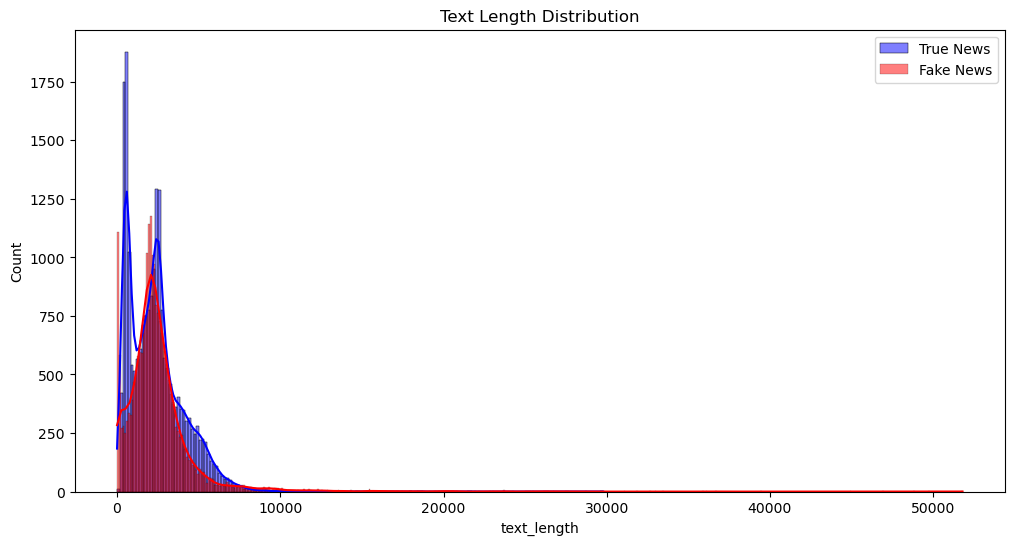

In [18]:
# Text length analysis
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['text_length'], color='blue', label='True News', kde=True)
sns.histplot(df[df['label'] == 1]['text_length'], color='red', label='Fake News', kde=True)
plt.legend()
plt.title('Text Length Distribution')
plt.show()

In [19]:
# Vectorizing the text data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['preprocessed_text'])
y = df['label']

In [20]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(),
    "Naive Bayes": MultinomialNB()
}
# Define a function to train the model using above mentioned models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("\n")

Logistic Regression Accuracy: 0.9889236965764153
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4197
           1       0.99      0.99      0.99      4741

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938

[[4154   43]
 [  56 4685]]


Random Forest Accuracy: 0.99742671738644
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4197
           1       1.00      1.00      1.00      4741

    accuracy                           1.00      8938
   macro avg       1.00      1.00      1.00      8938
weighted avg       1.00      1.00      1.00      8938

[[4191    6]
 [  17 4724]]


SVM Accuracy: 0.9940702618035354
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4197
           1       0.99      0.99      0.99      4741

 

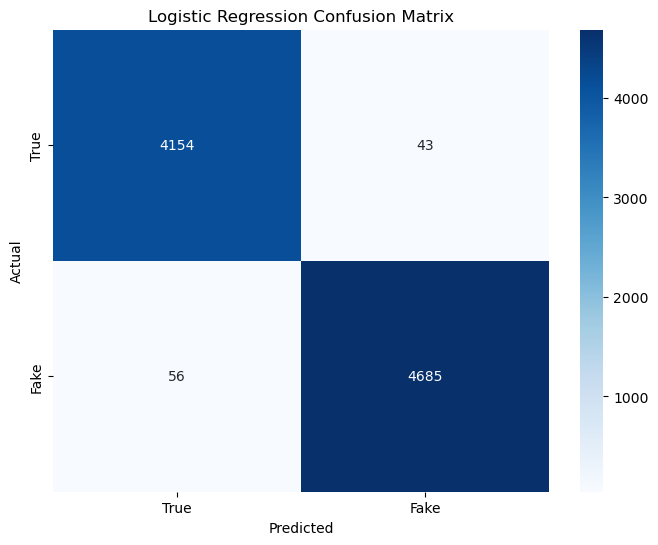

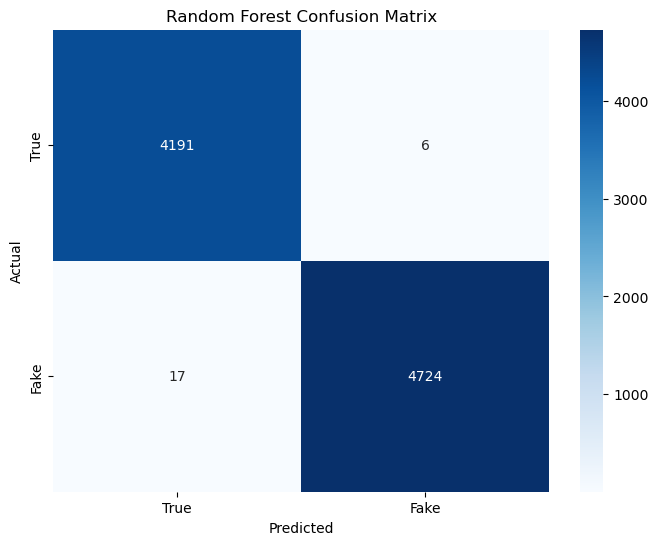

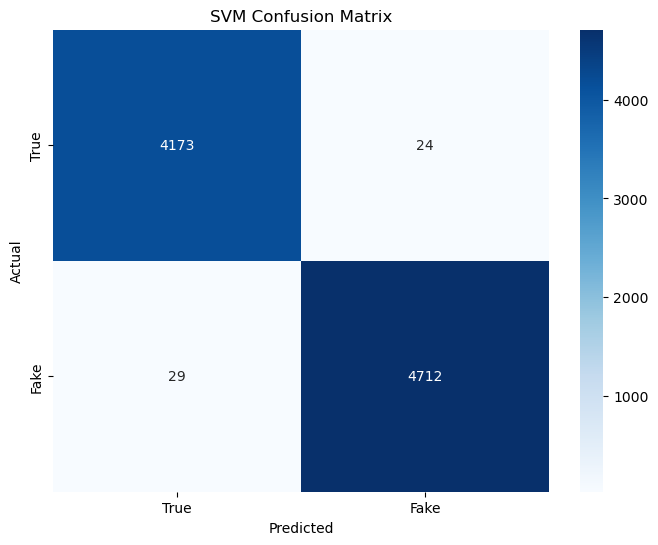

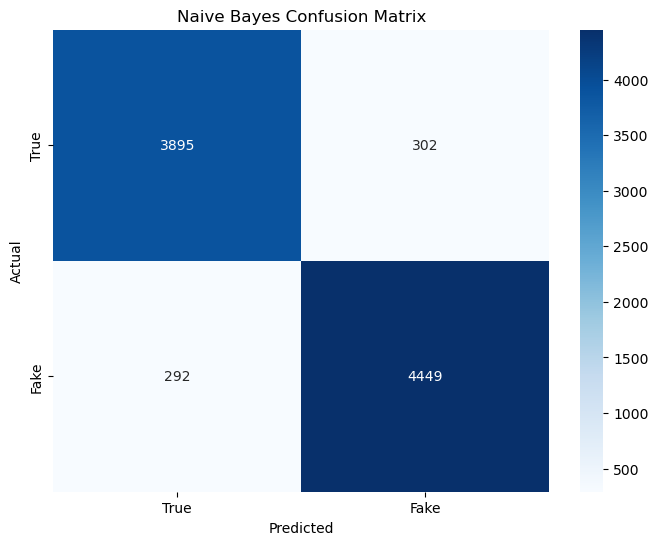

In [21]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'Fake'], yticklabels=['True', 'Fake'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()
# Plot confusion matrices for each model
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, title=f'{model_name} Confusion Matrix')

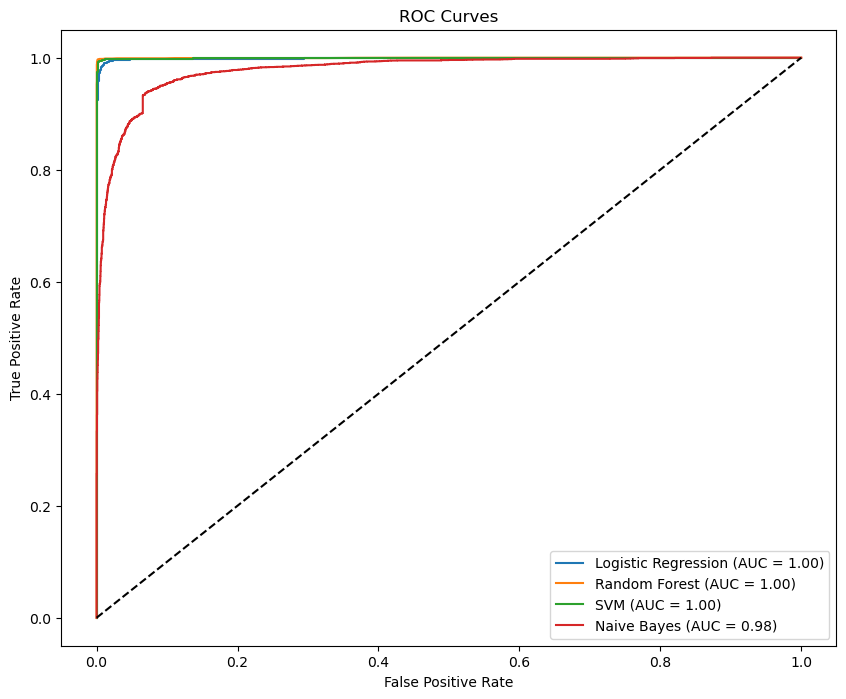

In [22]:
#Plot the ROC curve
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)
        
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='best')
plt.show()

In [25]:
#Hyperparameter tuning for log regression
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train, y_train)
best_model_lr = grid_search_lr.best_estimator_


Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [ ]:
# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)
best_model_rf = grid_search_rf.best_estimator_


In [24]:
#Evaluate the moelels 
best_models = {
    "Logistic Regression": best_model_lr,
    "Random Forest": best_model_rf,
    "SVM": best_model_svm
}

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"Best {name} Model Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

Best Logistic Regression Model Accuracy: 0.9953009621839337
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4197
           1       1.00      1.00      1.00      4741

    accuracy                           1.00      8938
   macro avg       1.00      1.00      1.00      8938
weighted avg       1.00      1.00      1.00      8938

[[4178   19]
 [  23 4718]]
